**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 17. Comparing Two Regression Lines &mdash; Part 2

## Using one model to fit two lines (with different intercepts)

### Example 1

In a Municipal Court in Columbus, Ohio, jury duty lasts two weeks, so the court randomly summons potential jurors 26 times over the course of a year. However, not every person who receives a summons actually shows up in court, and in fact the court has noticed a negative trend in the percent of jurors reporting as the calendar year goes on. 

After 1998, the court implemented a variety of methods to try to increase participation rates, and they are interested in knowing if (on average) these methods made any real difference.

The data `Jurors` in the `Stat2Data` library contains the participation rates for each of the 26 periods (numbered sequentially) for the years 1998 and 2000. Use this data to help answer the court's
question.

First, let's take a look at the data:

In [1]:
library(Stat2Data)
data(Jurors)
head(Jurors)

,Period,PctReport,Year,I2000
,<int>,<dbl>,<int>,<int>
1,1,83.3,1998,0
2,2,83.6,1998,0
3,3,70.5,1998,0
4,4,70.7,1998,0
5,5,80.5,1998,0
6,6,81.6,1998,0


#### a.
Make a color-coded plot of the data to help investigate what's going on. Comment on the general trends you see.

_Hints._ The `col` keyword argument in `plot()` lets you specify colors. You can combine this with the `ifelse()` function to conditionally color points in your plot, like this:

```r
col = ifelse(Jurors$Year == 1998, "black", "red")
```

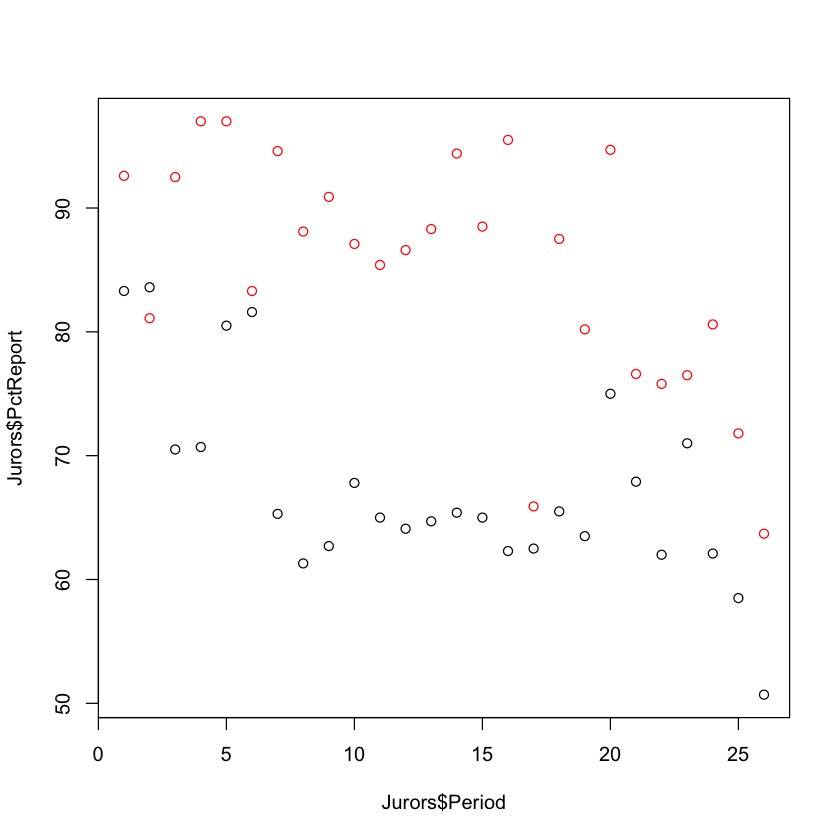

In [2]:
# Solution
plot(Jurors$Period, Jurors$PctReport,
     col = ifelse(Jurors$Year == 1998, "black", "red"))

*Write your notes here. Double-click to edit.*

*Solution.*

- In general, $\mathit{PctReport}$ slightly decreases as $\mathit{Period}$ increases.
- In general, the points with $\mathit{Year} = 2000$ have higher $\mathit{PctReport}$ than those with $\mathit{Year} = 1998$.

#### b.
The variable $\mathit{I2000}$ is an indicator variable:

$$ \mathit{I2000} = \begin{cases}
1 & \text{if } \mathit{Year} = 2000\\
0 & \text{otherwise}
\end{cases} $$

We can use the following _single_ population-level model to answer the court's question:

$$ \mathit{PctReport} = \beta_0 + \beta_1 \mathit{Period} + \beta_2 \mathit{I2000} + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

#### c.
Fit the model and report the prediction equation.

In [3]:
# Solution
fit <- lm(PctReport ~ Period + I2000, data = Jurors)
summary(fit)


Call:
lm(formula = PctReport ~ Period + I2000, data = Jurors)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8294  -3.3873  -0.8705   4.7642  14.1212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.0816     2.1297  36.193  < 2e-16 ***
Period       -0.7169     0.1241  -5.779 5.12e-07 ***
I2000        17.8346     1.8608   9.585 8.08e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.709 on 49 degrees of freedom
Multiple R-squared:  0.7188,	Adjusted R-squared:  0.7073 
F-statistic: 62.63 on 2 and 49 DF,  p-value: 3.166e-14


*Write your notes here. Double-click to edit.*

*Solution.*

$$ \widehat{\mathit{PctReport}} = 77.0816 - 0.7169 \mathit{Period} + 17.8346 \mathit{I2000} $$

#### A brief aside...

There are two other ways to include categorical variables into your model in R.

Instead of using the pre-defined indicator (which may not exist in other data sets!), you can create your own with the `I()` function, like this:

In [4]:
fit2 <- lm(PctReport ~ Period + I(Year == 2000), data = Jurors)
summary(fit2)


Call:
lm(formula = PctReport ~ Period + I(Year == 2000), data = Jurors)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8294  -3.3873  -0.8705   4.7642  14.1212 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          77.0816     2.1297  36.193  < 2e-16 ***
Period               -0.7169     0.1241  -5.779 5.12e-07 ***
I(Year == 2000)TRUE  17.8346     1.8608   9.585 8.08e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.709 on 49 degrees of freedom
Multiple R-squared:  0.7188,	Adjusted R-squared:  0.7073 
F-statistic: 62.63 on 2 and 49 DF,  p-value: 3.166e-14


As another option, you can tell R that the original variable (in our example, $\mathit{Year}$) is categorical with the `as.factor()` function, like this:

In [5]:
fit3 <- lm(PctReport ~ Period + as.factor(Year), data = Jurors)
summary(fit3)


Call:
lm(formula = PctReport ~ Period + as.factor(Year), data = Jurors)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8294  -3.3873  -0.8705   4.7642  14.1212 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          77.0816     2.1297  36.193  < 2e-16 ***
Period               -0.7169     0.1241  -5.779 5.12e-07 ***
as.factor(Year)2000  17.8346     1.8608   9.585 8.08e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.709 on 49 degrees of freedom
Multiple R-squared:  0.7188,	Adjusted R-squared:  0.7073 
F-statistic: 62.63 on 2 and 49 DF,  p-value: 3.166e-14


#### d.
Interpret the coefficients.

*Write your notes here. Double-click to edit.*

*Solution.*

- $\mathit{Period}$: After accounting for the year ($\mathit{I2000}$), considering one period later in the year is associated with a decrease of 0.7169% in participation rate, on average.

- $\mathit{I2000}$: After accounting for the period ($\mathit{Period}$), the jury duty being in 2000 vs. 1998 is associated with a 17.8436% increase participation rate, on average. 

#### e.
Does the model to appear to be a "good" model? Check the diagnostic plots, overall ANOVA F-test, and $R^2$.

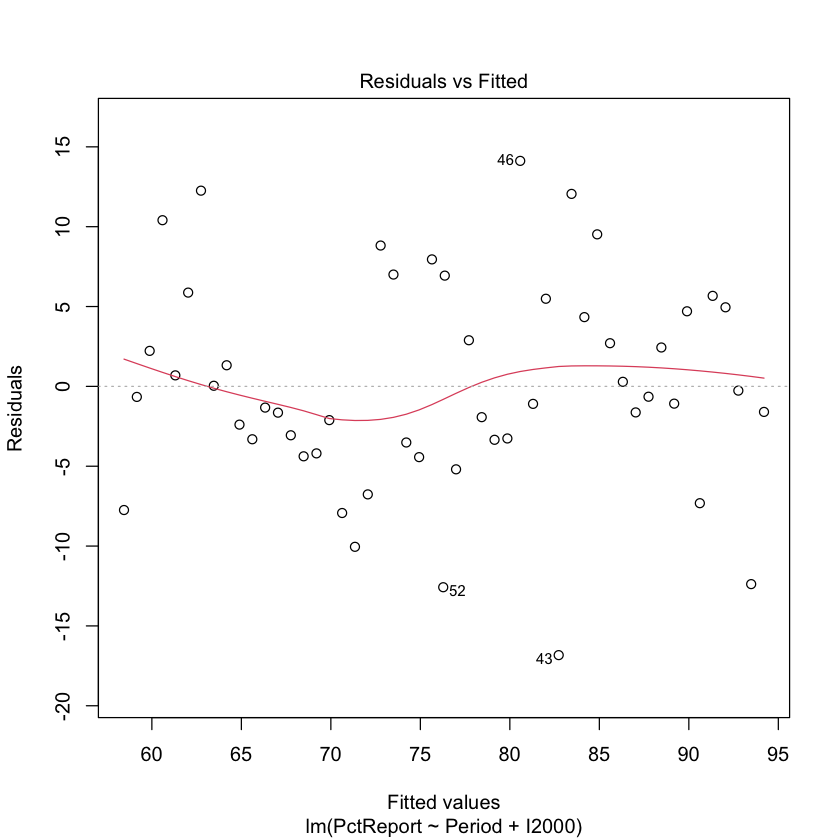

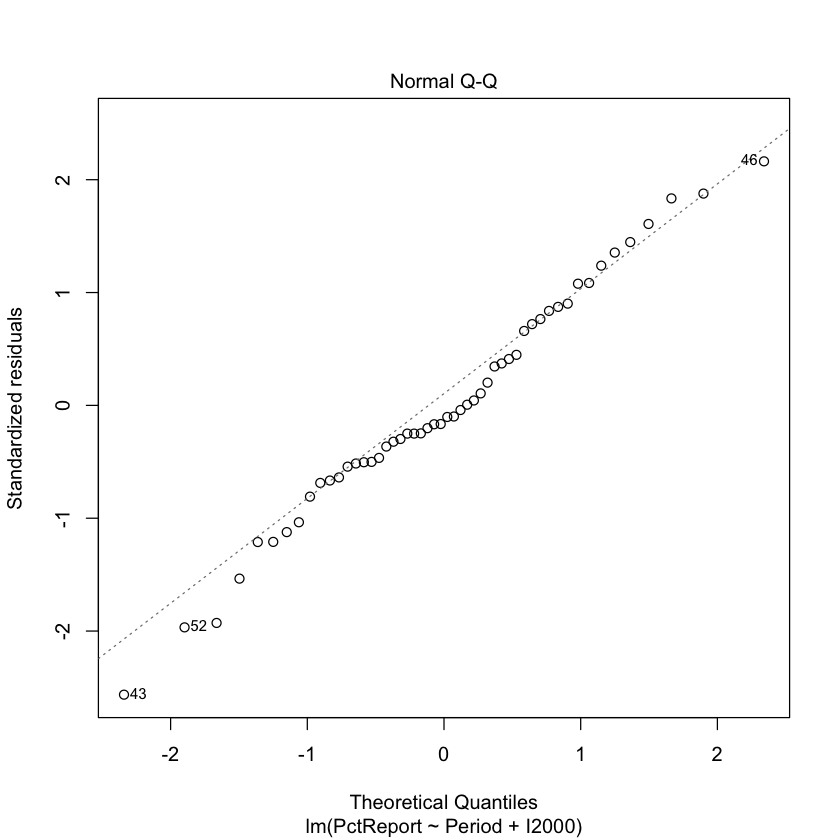

In [6]:
# Solution
plot(fit, which = 1)
plot(fit, which = 2)

*Write your notes here. Double-click to edit.*

*Solution.*

- Residuals vs. fitted values plot: Linearity and constant variance conditions seem OK.

- Normal Q-Q plot of residuals: Normality condition seems OK.

- ANOVA F-test: $p$-value = $3.166 \times 10^{-14}$. At a significance level of 0.05, we see evidence that the overall model is effective.

- $R^2$: 0.7188, pretty high. A large part of the variability in our response variable is explained by our model.

#### f.
Use a formal statistical test to address the court's question: Do you see evidence that, after accounting for the period of the year, the percentage of summoned jurors who reported to court was significantly different in 2000 than in 1998?

*Write your notes here. Double-click to edit.*

*Solution.* If 1998 vs. 2000 matters, then $\beta_2$ is not equal to zero. 

Looking at the $t$-test for $\beta_2$: we see significant evidence ($p$-value = $8.08 \times 10^{-13}$) that, after accounting for $\mathit{Period}$, $\mathit{PctReport}$ is different from 1998 to 2000.

#### g.
Provide a confidence interval that estimates the size of the average change (after accounting for the period of the year) in juror turnout from 1998 to 2000.

In [7]:
# Solution
confint(fit, level=0.95)

,2.5 %,97.5 %
(Intercept),72.8017366,81.361494
Period,-0.9661616,-0.467582
I2000,14.0952680,21.573963


## Allow different intercepts AND different slopes

### Example 2

In Example 1, we analyzed the $\mathit{Jurors}$ dataset to determine whether there was a difference in juror turnout ($\mathit{PctReport}$) between the years 1998 and 2000, after accounting for the time of year ($\mathit{Period}$).

The model we used, which __did not__ allow the two years to have different slopes for $\mathit{Period}$, was:

$$ \mathit{PctReport} = \beta_0 + \beta_1 \mathit{Period} + \beta_2 \mathit{I2000} + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

Now we want to allow different intercepts __and__ different slopes for $\mathit{Period}$. We can do so with the following model:

$$ \mathit{PctReport} = \beta_0 + \beta_1 \mathit{Period} + \beta_2 \mathit{I2000} + \beta_3 (\fbox{$\mathit{Period}$} \times \mathit{I2000}) + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$ 

#### a.
Fit the model and provide the summary output.

In [8]:
# Solution
fit <- lm(PctReport ~ Period + I2000 + Period:I2000, data = Jurors)
summary(fit)


Call:
lm(formula = PctReport ~ Period + I2000 + Period:I2000, data = Jurors)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.659  -3.148  -1.024   4.430  14.437 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   76.4255     2.7331  27.963  < 2e-16 ***
Period        -0.6683     0.1770  -3.776 0.000439 ***
I2000         19.1468     3.8652   4.954 9.44e-06 ***
Period:I2000  -0.0972     0.2503  -0.388 0.699473    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.768 on 48 degrees of freedom
Multiple R-squared:  0.7197,	Adjusted R-squared:  0.7022 
F-statistic: 41.08 on 3 and 48 DF,  p-value: 2.658e-13


#### b.
Do we see statistical evidence that the _rate of change_ in juror turnout over the course of the year differs between 1998 and 2000? Provide the four steps for the hypothesis test of the relevant coefficient.

*Write your notes here. Double-click to edit.*

*Solution.* 

The relevant coefficient is $\beta_3$, the coefficient of $\mathit{Period} \times \mathit{I2000}$.

1. $H_0: \beta_3 = 0$ versus $H_A: \beta_3 \ne 0$

2. $t$-statistic = -0.388

3. $p$-value = 0.699473

4. Assume $\alpha = 0.05$. Fail to reject $H_0$, because $p$-value > $\alpha$. After accounting for $\mathit{Period}$ and $\mathit{I2000}$, we do not see significant evidence that $\mathit{Period} \times \mathit{I2000}$ differs from 0, or that the rate of change in juror turnout over the course of the year differs between 1998 and 2000. 

## Exercises

### Problem 1
Suppose we are interested in how the growth rates of boys and girls compare.

The dataset `Kids198` from `Stat2Data` contains the ages (in months) and weights (in pounds) for a random sample of 198 children. Girls are coded as $\mathit{Sex} = 1$ and boys are corded as $\mathit{Sex} = 0$.

In [9]:
library(Stat2Data)
data(Kids198)
head(Kids198)

,Height,Weight,Age,Sex,Race
,<dbl>,<int>,<int>,<int>,<int>
1,67.8,166,210,0,1
2,63.0,93,144,1,0
3,50.1,54,119,0,0
4,55.7,69,130,1,0
5,63.2,115,157,0,0
6,48.8,52,102,0,0


#### a.
Make a color-coded plot of the data, and comment on the general trends you see.

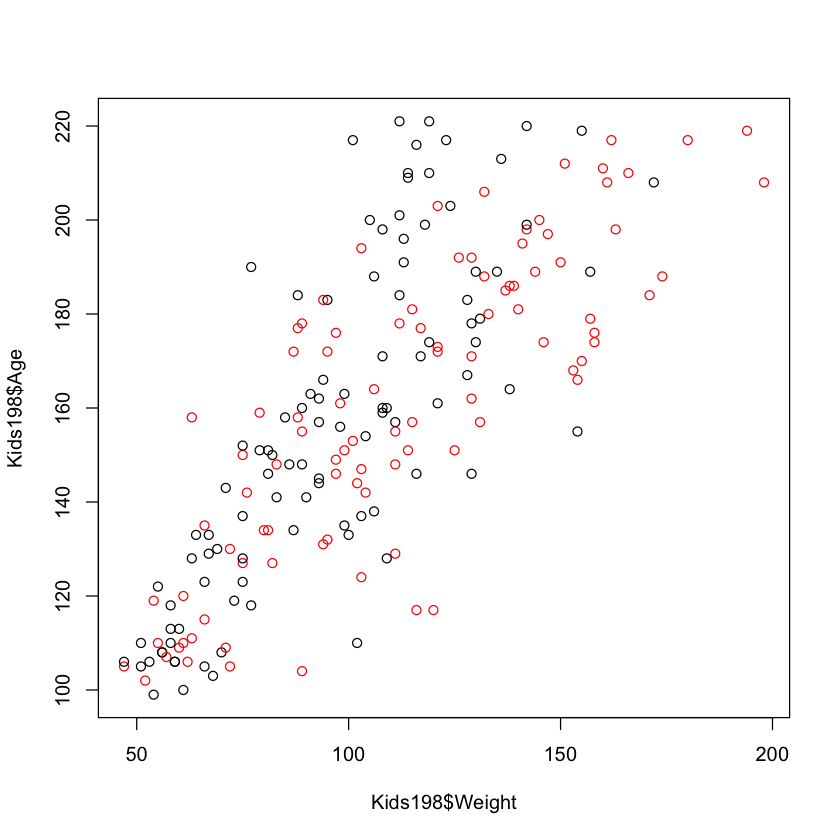

In [10]:
# Solution
plot(Kids198$Weight, Kids198$Age,
     col = ifelse(Kids198$Sex == 1, "black", "red"))

*Write your notes here. Double-click to edit.*

*Solution*. Hard to tell visually whether the least squares line slope for the black points (girls) is different from the least squares line slope for the red points (boys).

#### b.
Specify the single model you will use to answer the research question.

*Write your notes here. Double-click to edit.*

*Solution*.

$$ \mathit{Weight} = \beta_0 + \beta_1 \mathit{Age} + \beta_2 \mathit{Sex} + \beta_3 (\mathit{Age} \times \mathit{Sex}) + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

#### c.
Fit the model and report the prediction equation.

In [11]:
# Solution
fit <- lm(Weight ~ Age + Sex + Age:Sex, data = Kids198)
summary(fit)


Call:
lm(formula = Weight ~ Age + Sex + Age:Sex, data = Kids198)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.884 -12.055  -2.782  10.185  58.581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.69254   10.00727  -3.367 0.000917 ***
Age           0.90871    0.06106  14.882  < 2e-16 ***
Sex          31.85057   13.24269   2.405 0.017106 *  
Age:Sex      -0.28122    0.08164  -3.445 0.000700 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.19 on 194 degrees of freedom
Multiple R-squared:  0.6683,	Adjusted R-squared:  0.6631 
F-statistic: 130.3 on 3 and 194 DF,  p-value: < 2.2e-16


*Solution.*

$$ \widehat{\mathit{Weight}} = -33.69254 + 0.90871 \mathit{Age} + 31.85057 \mathit{Sex} - 0.28122 (\mathit{Age} \times \mathit{Sex}) $$

#### d.
Does the model appear to be a "good" model? Justify your answer.

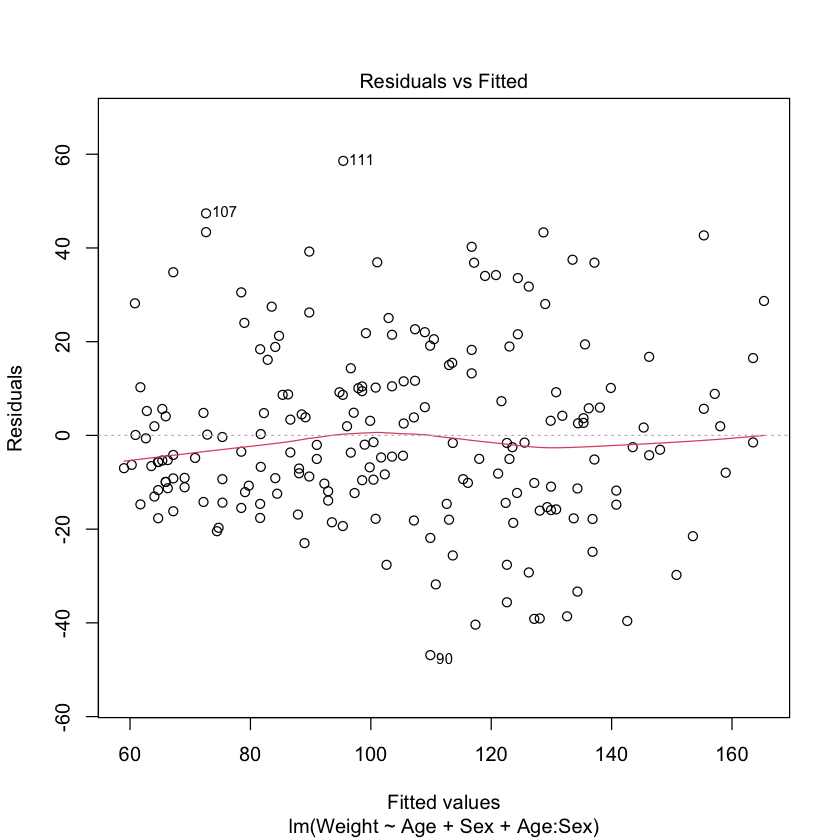

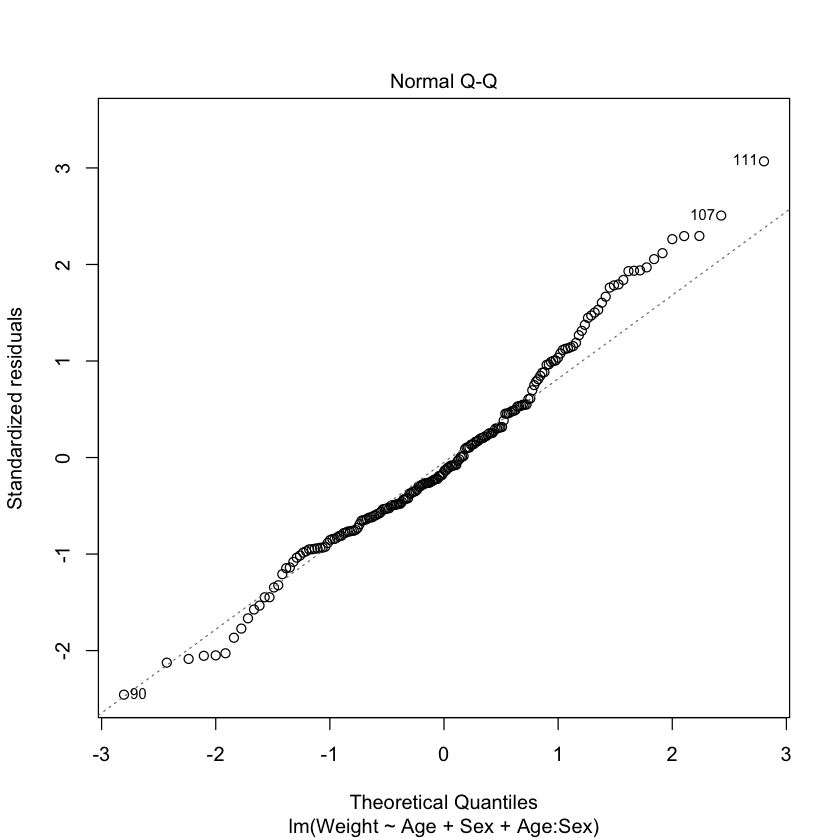

In [12]:
# Solution
plot(fit, which = 1)
plot(fit, which = 2)

*Write your notes here. Double-click to edit.*

*Solution.*

- Residuals vs. fitted values plot: Linearity and constant variance conditions seem OK.

- Normal Q-Q plot of residuals: Normality condition seems OK.

- ANOVA F-test: $p$-value < $2.2 \times 10^{-16}$. At a significance level of 0.05, we see evidence that the overall model is effective.

- $R^2$: 0.6683, pretty high. A large part of the variability in our response variable is explained by our model.

#### e.
Is the growth rate (i.e., the slope of $\mathit{Age}$) significantly different for boys versus girls? Justify your answer.

*Write your notes here. Double-click to edit.*

*Solution.*

The relevant coefficient is $\beta_3$, the coefficient of $\mathit{Age} \times \mathit{Sex}$.

1. $H_0: \beta_3 = 0$ versus $H_A: \beta_3 \ne 0$

2. $t$-statistic = -3.445

3. $p$-value = 0.0007

4. Assume $\alpha = 0.05$. Reject $H_0$, because $p$-value < $\alpha$. After accounting for $\mathit{Age}$ and $\mathit{Sex}$, we see significant evidence that $\mathit{Age} \times \mathit{Sex}$ differs from 0, or that the growth rate differs between girls and boys. 

#### f.
Provide an interval estimating how much the growth rates differ.
Be clear which sex appears to grow faster.

In [13]:
# Solution
confint(fit, level = 0.95)

,2.5 %,97.5 %
(Intercept),-53.4295458,-13.9555301
Age,0.7882792,1.0291404
Sex,5.7324387,57.9686922
Age:Sex,-0.4422327,-0.1202112


*Write your notes here. Double-click to edit.*

*Solution.*

95% confidence interval for $\beta_3$: (-0.442, -0.120)$.

Growth rate decreases when we go from boys ($\mathit{Sex} = 0$) to girls ($\mathit{Sex} = 1$), so boys are growing faster.